In [1]:
import numpy as np
from pathlib import Path
from astropy import stats
from astropy import units as u
from astropy.modeling import models, fitting

from keckdata import KeckData, KeckDataList, fits_reader, analysis

# %matplotlib inline
# from matplotlib import pyplot as plt

/Users/jwalawender/anaconda/lib/python3.6/site-packages/scipy/__init__.py:115: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.11.3)
  UserWarning)


In [2]:
## HIRES

# p_2019oct11 = Path('/Volumes/JOSHW/HIRES/2019oct11')
# files = sorted([f for f in p_2019oct11.glob('*fits')])
# p_2019oct12 = Path('/Volumes/JOSHW/HIRES/2019oct12')
# files.extend( sorted([f for f in p_2019oct12.glob('*fits')]) )
# kdl_biasesdarks = KeckDataList(files, verbose=False)

# p_2019oct19 = Path('/Volumes/JOSHW/HIRES/2019oct19')
# files = sorted([f for f in p_2019oct19.glob('hires*.fits')])
# kdl_flats = KeckDataList(files, verbose=False)

# RN = analysis.determine_read_noise(kdl_biasesdarks, plot=True, trim=256)
# for i,r in enumerate(RN):
#     print(f"Read Noise (ext {i}) = {r:.2f}")

# master_bias = analysis.make_master_bias(kdl_biasesdarks)
# DC = analysis.determine_dark_current(kdl_mcds16, master_bias=master_bias, plot=True, trim=256, nozero=True, usemedian=False)
# print(DC*nominal_gain)

# g = analysis.determine_gain(kdl_flats, master_bias=master_bias, read_noise=RN, plot=True)

2019-10-29 17:59:50     INFO: Determining read noise
2019-10-29 17:59:50     INFO:   Checking that all inputs are BIAS frames
2019-10-29 17:59:50     INFO:   Found 16 biases
2019-10-29 17:59:50     INFO: Making master bias from 15 frames
2019-10-29 17:59:50     INFO: Making master bias for each of 1 extensions
2019-10-29 18:00:00     INFO:   Done
2019-10-29 18:00:00     INFO:   Determining read noise for each of 1 extensions
2019-10-29 18:00:03     INFO:   Read Noise is 10.30 adu for extension 1
2019-10-29 18:00:03     INFO:   Generating plot for: m191029_0033.fits, frame 0
2019-10-29 18:00:05     INFO:   Generating read noise plot: read_noise_MOSFIRE_ext0.png
2019-10-29 18:00:07     INFO: Determining read noise
2019-10-29 18:00:07     INFO:   Checking that all inputs are BIAS frames
2019-10-29 18:00:07     INFO:   Found 12 biases
2019-10-29 18:00:07     INFO: Making master bias from 11 frames
2019-10-29 18:00:07     INFO: Making master bias for each of 1 extensions


Read Noise (ext 0) = 10.30 adu


2019-10-29 18:00:16     INFO:   Done
2019-10-29 18:00:16     INFO:   Determining read noise for each of 1 extensions
2019-10-29 18:00:20     INFO:   Read Noise is 2.84 adu for extension 1
2019-10-29 18:00:20     INFO:   Generating plot for: m191029_0133.fits, frame 0
2019-10-29 18:00:21     INFO:   Generating read noise plot: read_noise_MOSFIRE_ext0.png


Read Noise (ext 0) = 2.84 adu


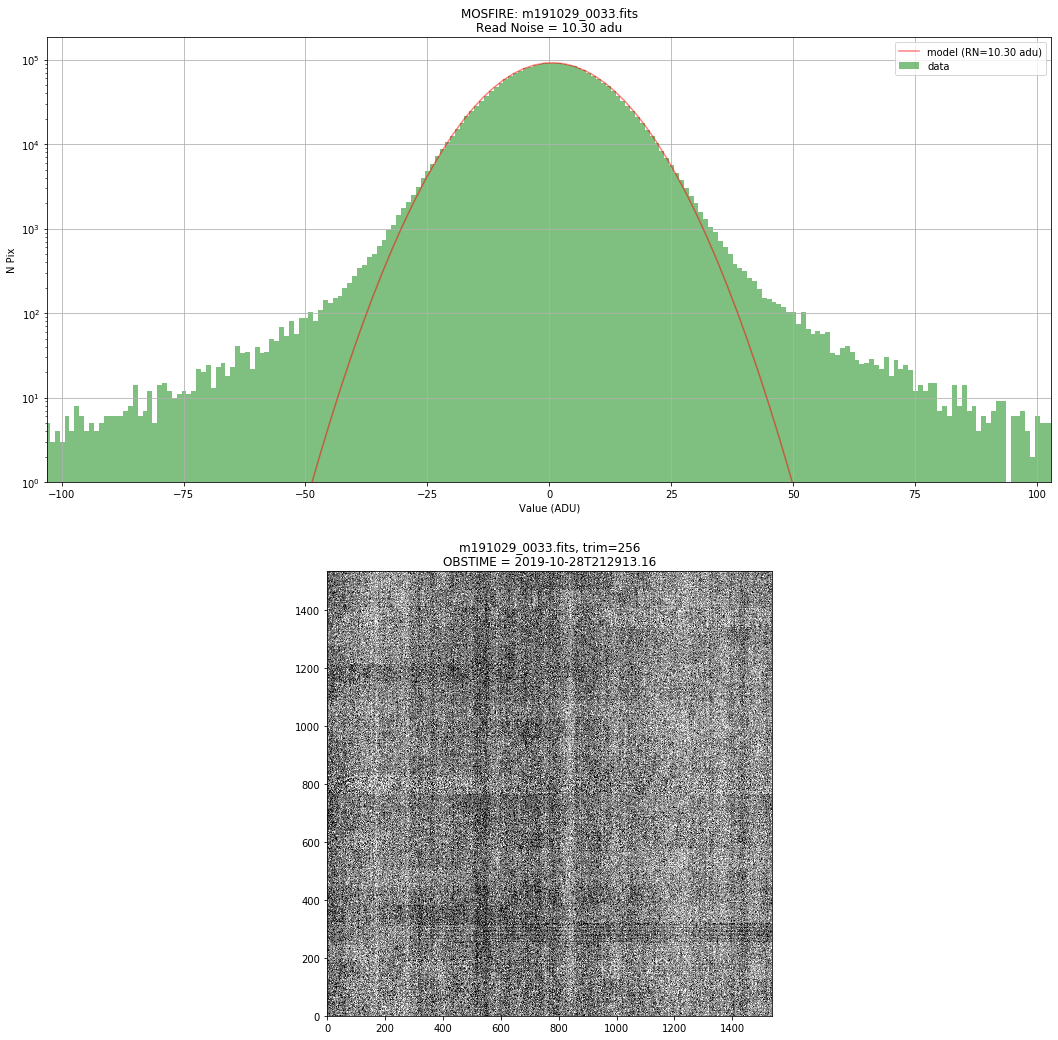

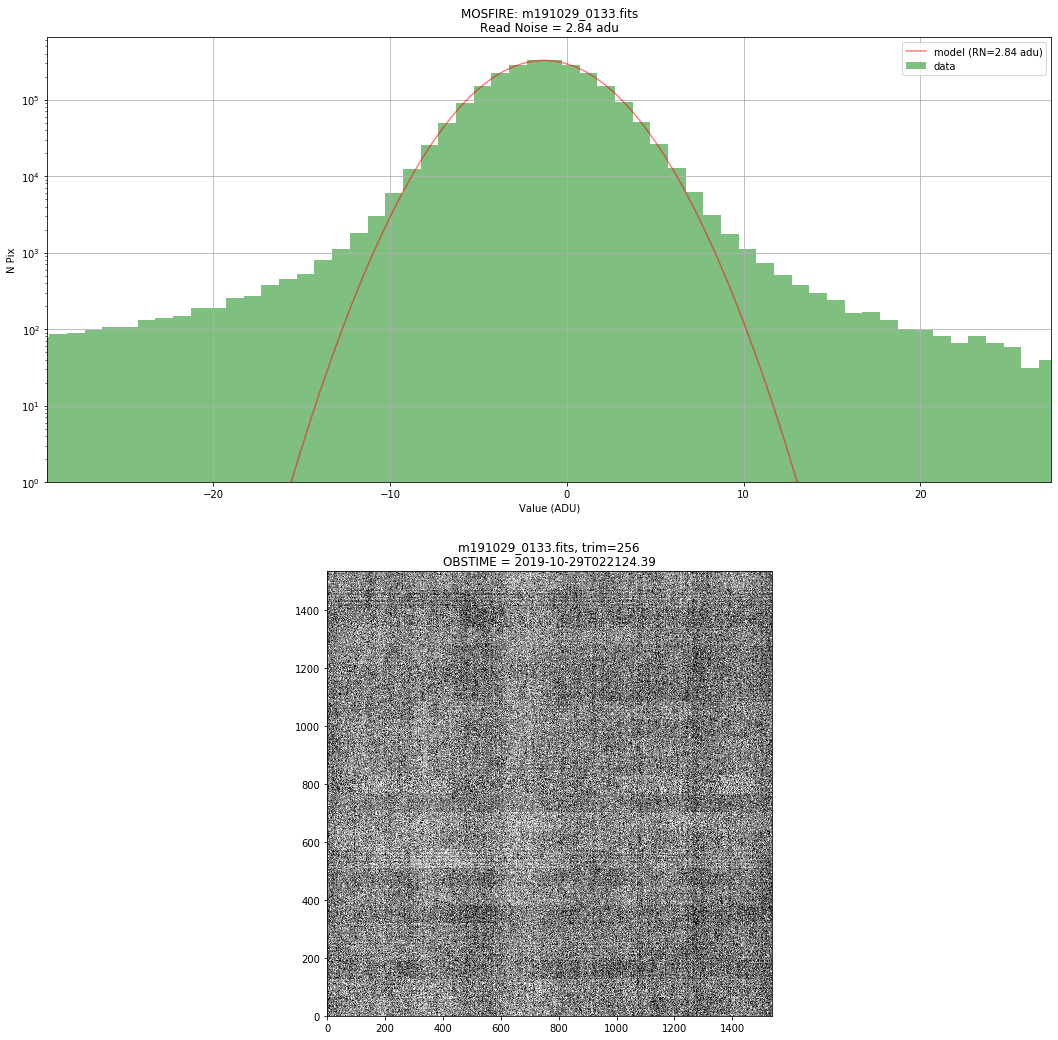

In [3]:
## MOSFIRE

nominal_gain = 2.15 * u.electron/u.adu
p_darks = Path('/Volumes/JOSHW/MOSFIRE_Darks/2019oct29')
files = sorted([f for f in p_darks.glob('m*.fits')])
kdl_biasesdarks = KeckDataList(files, verbose=False)

kdl_cds = KeckDataList( [kd for kd in kdl_biasesdarks.frames if kd.readout_mode() == 'CDS'] )
kdl_mcds16 = KeckDataList( [kd for kd in kdl_biasesdarks.frames if kd.readout_mode() == 'MCDS16'] )

RNcds = analysis.determine_read_noise(kdl_cds, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RNcds):
    print(f"Read Noise (ext {i}) = {r:.2f}")

RNmcds = analysis.determine_read_noise(kdl_mcds16, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RNmcds):
    print(f"Read Noise (ext {i}) = {r:.2f}")

2019-10-29 18:00:25     INFO: Determining read noise
2019-10-29 18:00:25     INFO:   Checking that all inputs are BIAS frames
2019-10-29 18:00:25     INFO:   Found 18 biases
2019-10-29 18:00:25     INFO: Making master bias from 17 frames
2019-10-29 18:00:25     INFO: Making master bias for each of 1 extensions
2019-10-29 18:00:37     INFO:   Done
2019-10-29 18:00:37     INFO:   Determining read noise for each of 1 extensions
2019-10-29 18:00:41     INFO:   Read Noise is 3.91 adu for extension 1
2019-10-29 18:00:41     INFO:   Generating plot for: nspec191030_0018.fits, frame 0
2019-10-29 18:00:42     INFO:   Generating read noise plot: read_noise_NIRSPEC_SPEC_ext0.png


Read Noise (ext 0) = 8.22 electron


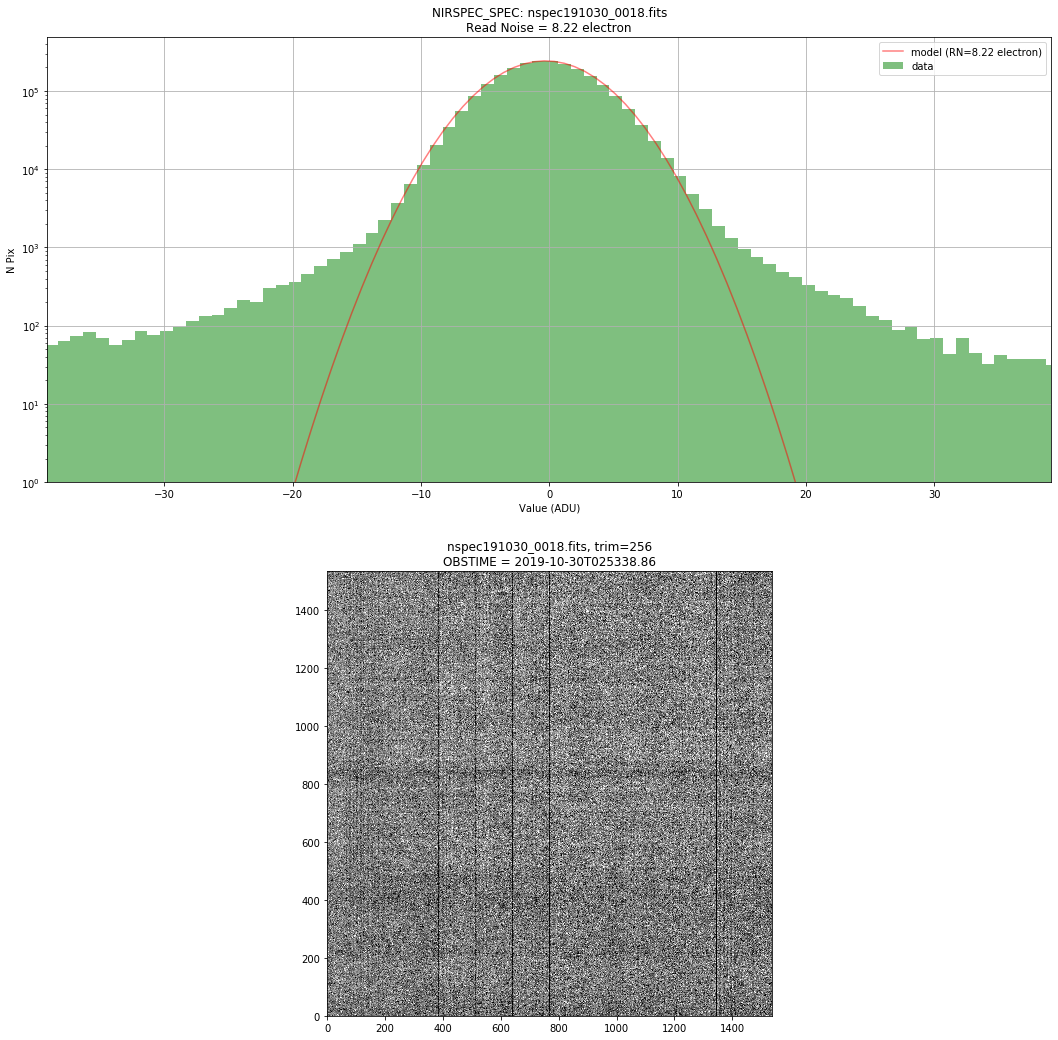

In [4]:
## NIRSPEC SPEC

nominal_gain = 2.1 * u.electron/u.adu
p_darks = Path('/Volumes/JOSHW/NIRSPEC/spec')
files = sorted([f for f in p_darks.glob('nspec*.fits')])
kdl_biasesdarks = KeckDataList(files, verbose=False)
kdl_biasesdarks.len

RN = analysis.determine_read_noise(kdl_biasesdarks, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RN):
    print(f"Read Noise (ext {i}) = {r:.2f}")